In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import networkx as nx
import seaborn
plt.rcParams.update({"font.size":15, "figure.figsize":(10,4)})

In [3]:
RISKGROUPS = [0, 1, 2] 
FRACTIONS_RISKGROUPS = [0.2, 0.5, 0.3]  

class Agent:
	""" define an agent and its properties """
	def __init__(self, _id):
		""" initialise Agent """
		self.id = _id	# Unique ID of an agent
		self.state = "s"	 	# health: susceptible to the virus
		self.group = np.random.choice(RISKGROUPS, p=FRACTIONS_RISKGROUPS)	



In [4]:
agents = []
for id in range(1000):
    ag = Agent(id)
    agents.append(ag)

In [5]:
groups = [ag.group for ag in agents]


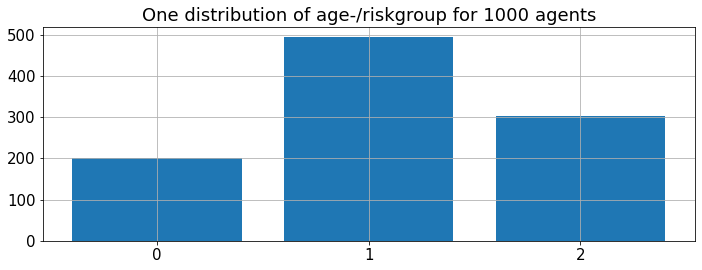

In [6]:
data = np.array(groups) 
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.8 )
plt.title("One distribution of age-/riskgroup for 1000 agents")
plt.xticks([0,1,2])
plt.grid()
plt.tight_layout()
plt.savefig("DistGroups.pdf", bbox_inches="tight")
plt.show()


In [7]:
import imageio

In [8]:
N = stats.norm(1.2, 0.2)

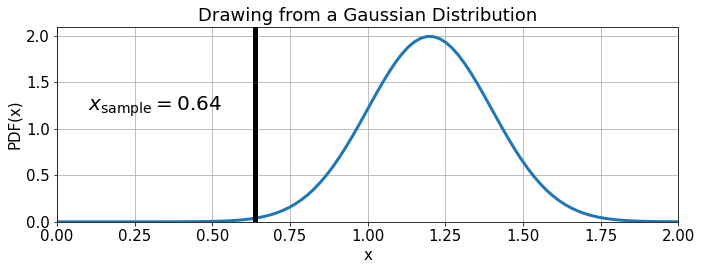

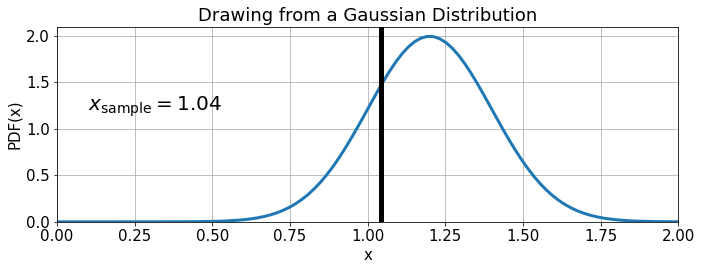

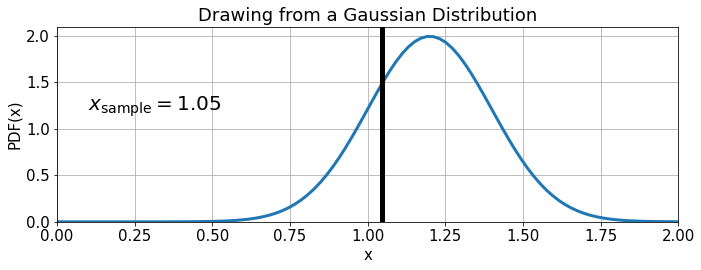

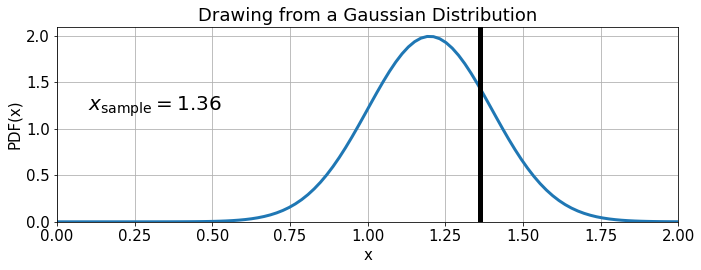

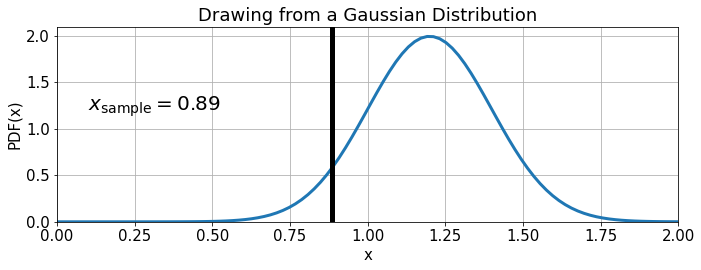

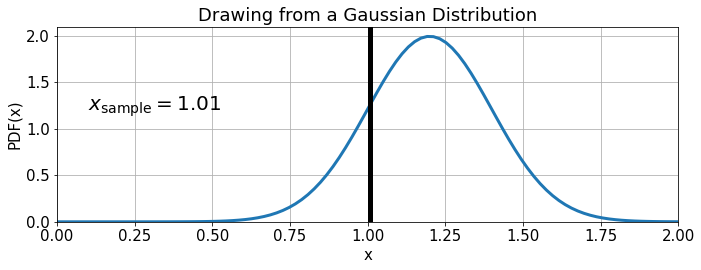

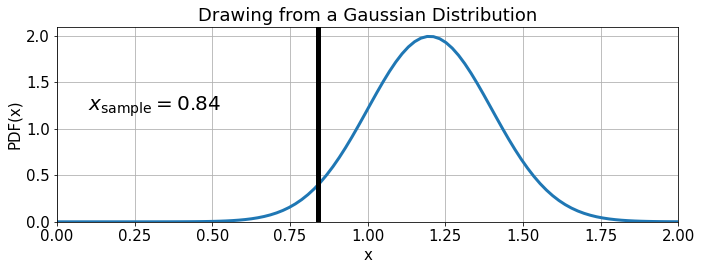

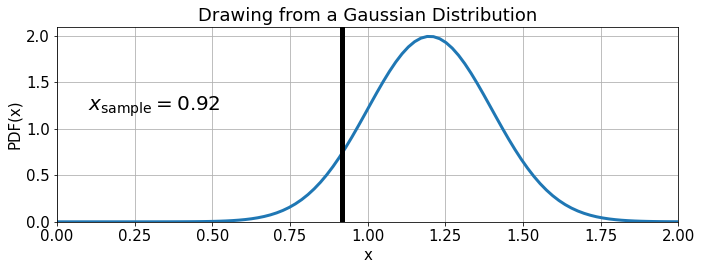

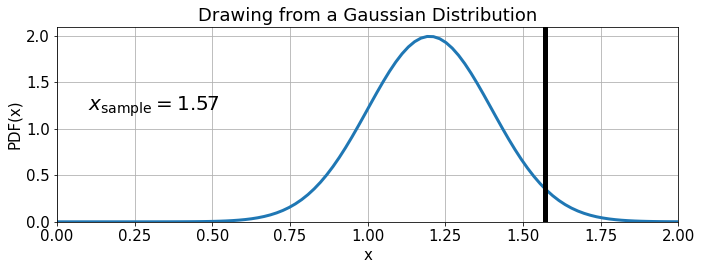

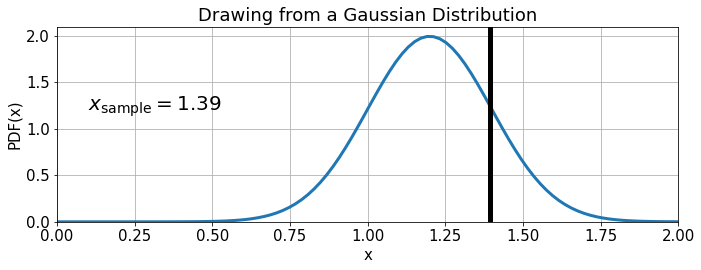

In [9]:
def plot_for_offset(i):
    # Data for plotting
    t = np.linspace(0, 2, 100)

    fig, ax = plt.subplots()
    ax.plot(t, N.pdf(t), lw=3)
    ax.grid()
    ax.set(xlabel='x', ylabel='PDF(x)',
           title='Drawing from a Gaussian Distribution')
    ax.set_ylim(0,)
    x = N.rvs()
    ymax = ax.get_ylim()[1]
    ax.axvline(x, 0, ymax, lw=5, color="black")
    ax.text( 0.1, 1.2, r"$x_{\rm sample}=$"+"{:.2f}".format(x), fontsize=20)
    ax.set_xlim(0,2)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#imageio.mimsave('./drawingfromdist.gif', [plot_for_offset(i) for i in range(10)], fps=1)
for i in range(10):
    plot_for_offset(i)
    plt.tight_layout()
    plt.savefig("draw_dist_"+str(i)+".png")
    plt.show()

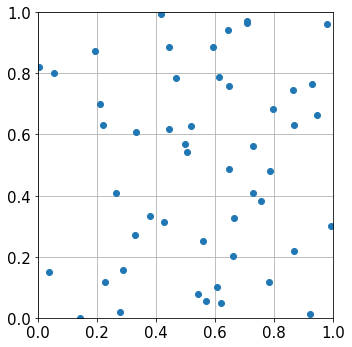

In [11]:
plt.figure(figsize=(5,5))
x = np.random.random(50)
y = np.random.random(50)
plt.plot(x, y, "o")
plt.grid()
plt.tight_layout()
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig("uniform_xy.pdf", bbox_inches="tight")

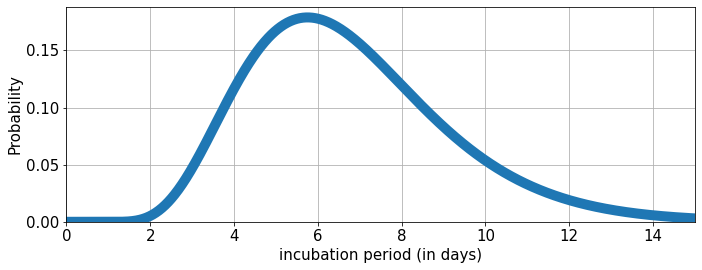

In [12]:
t = np.linspace(0, 15, 1000)

fig, ax = plt.subplots()
N = stats.gamma(5.807, 0.948)
ax.plot(t, N.pdf(t), lw=10)
ax.grid()
ax.set(xlabel='incubation period (in days)', ylabel='Probability')
ax.set_ylim(0,)
ax.set_xlim(0,max(t))

# Used to return the plot as an image rray
fig.canvas.draw()       # draw the canvas, cache the renderer
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.tight_layout()
plt.savefig("GammaDist_.pdf", bbox_inches = "tight")
plt.show()

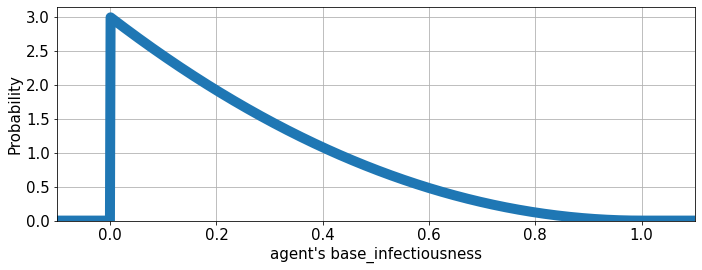

In [13]:
t = np.linspace(-0.1, 1.1, 1000)

fig, ax = plt.subplots()
N = stats.beta(1,3)
ax.plot(t, N.pdf(t), lw=10)
ax.grid()
ax.set(xlabel="agent's base_infectiousness", ylabel="Probability")
ax.set_ylim(0,)
ax.set_xlim(min(t),max(t))

# Used to return the plot as an image rray
fig.canvas.draw()       # draw the canvas, cache the renderer
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.tight_layout()
plt.savefig("BetaDist_.pdf", bbox_inches = "tight")
plt.show()

In [14]:
# Risk Groups:
RISKGROUPS = [0, 1, 2]  # Group: 0 = children (risk-free), 1 = adults, (small risk), 2 = high-risk group.
FRACTIONS_RISKGROUPS = [0.2, 0.5, 0.3]  # Fractions of risk groups

"""
Corona specific Distributions and Probabilities
"""
# AGENT_INFECTIOUSNESS = Distribution from which we draw the infectiousness of an symptomatic individual
#                           within the infectiousness period.
# Educated Guess (there are a few super spreaders, many not-so infectious people) --> long tail to high values
# this needs to be adjusted such that we get a mean reproductive number r (in the beginning of the simulation with an
# entirely susceptible society) in the range of realistic values.
AGENT_INFECTIOUSNESS = stats.beta(1, 3)

# P_SYMPTOMATIC = Probability of each group that, if infected with the virus how likely symptoms occur.
# Educated Guess (--> manifestation index)
P_SYMPTOMATIC = [0.1, 0.5, 0.8] # should sum to 1

# INCUBATION_TIME_DIST = Distribution of Incubation Periods
# estimated by
# Lauer, et. al (2020) "The Incubation Period of Coronavirus Disease 2019 (COVID-19). From Publicly Reported
# Confirmed Cases: Estimation and Application" (Table in Appendix 2)
# Mean roughly 5.8 days. Long tail.
INCUBATION_PERIOD_DIST = stats.gamma(5.807, 0.948)
# Γ(α,λ)=Γ(2.810,0.419) # https://www.medrxiv.org/content/10.1101/2020.10.20.20216143v1


# CASE_FATALITY_RATE = Probability that given a person has symptoms, the Covid infection leads to her death
#                       for each risk group
# Educated Guess (children "don't" die, adults seldom, risk group roughly 5%)
CASE_FATALITY_RATE = [0.0001, 0.005, 0.05]

# INFECTIOUSNESS_ = Infectiousness depending on the type of infection w.r.t. symptomatic infectiousness
# educated guess (without symptoms, the distribution of virus is smaller than with symptoms,
#   asymptomatic cases have significantly smaller viral loads)
INFECTIOUSNESS_SYMPTOMATIC = 1  # Fix!
INFECTIOUSNESS_ASYMPTOMATIC = 0.2
INFECTIOUSNESS_PRESYMPTOMATIC = 0.5

# TIME_PRE-/POST-SYMPTOM_INFECTION = time of potential infectiousness of an agent before/after symptom onset
#       (corresponds to the same period for asymptotic cases)
# Educated guess:
#       - He (2020), says roughly 2 days before symptom onset; Ferguson (2020) uses 0.5 days before
#       - ... (2020) says viral load after 7 days after symptom onset very low;
#         ... (2020) uses exponentially declining viral load after symptom onset
TIME_PRESYMPTOM_INFECTION = 2
TIME_POSTSYMPTOM_INFECTION = 4


class Agent:
    """ define an agent and its properties """
    def __init__(self, _id):
        """ initialise Agent """
        # General properties
        self.id = _id
        self.state = "s"  # susceptible
        self.group = np.random.choice(RISKGROUPS, p=FRACTIONS_RISKGROUPS)

        # infection specific attributes (for later)
        # np.nan --> they are not yet defined.
        self.t_e = np.nan  # time of catching the virus
        self.symptomatic = np.nan
        self.t_onset_symptoms = np.nan
        self.fatal_case = np.nan
        self.infectious_period = [np.nan, np.nan]
        self.base_infectiousness = np.nan

        # For analysis of reproduction number r over time.
        self.r = np.nan
        return

    def catch_virus(self, t_exposure):
        """
        Determine the course of the infection, after being exposed and catching the virus.
        An agent has been in contact with an infectious individual AND has been exposed (and caught) the virus.
        - agent's state switches to e (and t_e to the exposure time).
        - agent's infection specific properties are determined:
            - symptomatic
            - infectious_period
            - (t_onset_symptoms)
            - (fatal_case)
            - infectiousness
        - the agent's r value (how many agents did this person infect) is defined and initialised with 0.

        :param t_exposure: (float). The time at which the agent catches the virus
        :return: --   (just changing agent's attributes)
        """

        self.state = "e"  # Exposed
        self.t_e = t_exposure

        # Probability that the infection will be symptomatic (dependent on riskgroup)
        p_s = P_SYMPTOMATIC[self.group]
        self.symptomatic = np.random.choice([True, False], p=[p_s, 1 - p_s])

        incubation_period = INCUBATION_PERIOD_DIST.rvs()
        self.infectious_period = [
            self.t_e + incubation_period - TIME_PRESYMPTOM_INFECTION,
            self.t_e + incubation_period + TIME_POSTSYMPTOM_INFECTION
        ]
        if self.symptomatic:
            # Symptomatic Case
            self.t_onset_symptoms = self.t_e + incubation_period

            # Probability to die, given symptomatic case
            p_c = CASE_FATALITY_RATE[self.group]
            self.fatal_case = np.random.choice([True, False], p=[p_c, 1 - p_c])
        else:
            self.t_onset_symptoms = np.nan
            self.fatal_case = False
        self.base_infectiousness = min(1, AGENT_INFECTIOUSNESS.rvs())  # * FACTOR_INFECTIOUSNESS

        self.r = 0
        return


In [15]:
plt.barh?

Signature: plt.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
Docstring:
Make a horizontal bar plot.

The bars are positioned at *y* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The horizontal baseline
is *left* (default 0).

Each of *y*, *width*, *height*, and *left* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
y : scalar or array-like
    The y coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

width : scalar or array-like
    The width(s) of the bars.

height : sequence of scalars, optional, default: 0.8
    The heights of the bars.

left : sequence of scalars
    The x coordinates of the left sides of the bars (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the base to the *y* coordinates*:

    - 'center': Center the bars on the *y* positions.

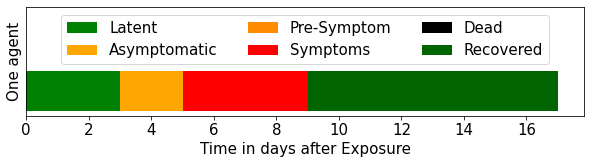

In [16]:
plt.figure(figsize=(10,2))
for id in range(1):
    ag = Agent(id)
    ag.catch_virus(0)
    ag.t_onset_symptoms=5
    ag.infectious_period=[5-2, 5+4]
    ag.symptomatic=True
    ag.fatal_case=False
    plt.barh(id, ag.infectious_period[0], left=None, color="green")
    if ag.symptomatic==False:
        plt.barh(id, ag.infectious_period[1]-ag.infectious_period[0], left=ag.infectious_period[0], color="orange")
    else:
        plt.barh(id, ag.t_onset_symptoms-ag.infectious_period[0], left=ag.infectious_period[0], color="orange")
        plt.barh(id, ag.infectious_period[1]- ag.t_onset_symptoms, left=ag.t_onset_symptoms, color="red")
    
    if ag.fatal_case==True:
        print("True")
        plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="black")
    else:
        plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="darkgreen")
plt.xlabel("Time in days after Exposure")
plt.yticks([])

id = 20
plt.ylim(-0.5,1.7)
plt.barh(id, ag.infectious_period[0], left=None, color="green", label="Latent")
plt.barh(id, ag.infectious_period[1]-ag.infectious_period[0], left=ag.infectious_period[0], color="orange", label="Asymptomatic")
plt.barh(id, ag.t_onset_symptoms-ag.infectious_period[0], left=ag.infectious_period[0], color="darkorange", label="Pre-Symptom")
plt.barh(id, ag.infectious_period[1]- ag.t_onset_symptoms, left=ag.t_onset_symptoms, color="red", label="Symptoms")
plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="black", label="Dead")
plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="darkgreen", label="Recovered")

plt.legend(ncol=3, loc="upper center")
plt.ylabel("One agent")
plt.savefig("single_agents_sickness.pdf")

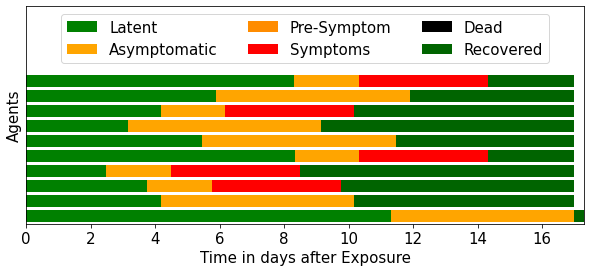

In [17]:
for id in range(10):
    ag = Agent(id)
    ag.catch_virus(0)
    plt.barh(id, ag.infectious_period[0], left=None, color="green")
    if ag.symptomatic==False:
        plt.barh(id, ag.infectious_period[1]-ag.infectious_period[0], left=ag.infectious_period[0], color="orange")
    else:
        plt.barh(id, ag.t_onset_symptoms-ag.infectious_period[0], left=ag.infectious_period[0], color="orange")
        plt.barh(id, ag.infectious_period[1]- ag.t_onset_symptoms, left=ag.t_onset_symptoms, color="red")
    
    if ag.fatal_case==True:
        print("True")
        plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="black")
    else:
        plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="darkgreen")
plt.xlabel("Time in days after Exposure")
plt.yticks([])

id = 20
plt.ylim(-0.5,14)
plt.barh(id, ag.infectious_period[0], left=None, color="green", label="Latent")
plt.barh(id, ag.infectious_period[1]-ag.infectious_period[0], left=ag.infectious_period[0], color="orange", label="Asymptomatic")
plt.barh(id, ag.t_onset_symptoms-ag.infectious_period[0], left=ag.infectious_period[0], color="darkorange", label="Pre-Symptom")
plt.barh(id, ag.infectious_period[1]- ag.t_onset_symptoms, left=ag.t_onset_symptoms, color="red", label="Symptoms")
plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="black", label="Dead")
plt.barh(id, 17-ag.infectious_period[1], left = ag.infectious_period[1], color="darkgreen", label="Recovered")

plt.legend(ncol=3, loc="upper center")
plt.ylabel("Agents")
plt.savefig("agents_sickness.pdf")

<Figure size 720x288 with 0 Axes>

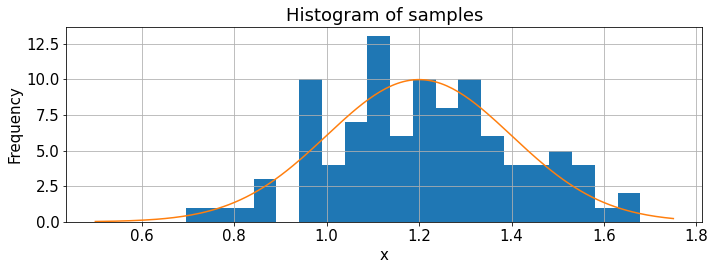

In [30]:
N = stats.norm(1.2, 0.2)
plt.hist(N.rvs(100), bins=20)
I = np.linspace(0.5,1.75,200)
plt.plot(I, N.pdf(I)*5)
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("Histogram of samples")
plt.grid()
plt.tight_layout()
plt.savefig("rvs.pdf", bbox_inches="tight")
